# Comparison between VGG16 architecture and Custom CNN architecture #

In [1]:
import os
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score,f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications import VGG16, VGG19
from keras import optimizers

In [4]:
np.random.seed(42)

## Data Preprocessing ##

Defining path and Image Dimensions

In [7]:
train_dir = 'C:\\Users\\USER\\OneDrive\\Desktop\\Datasets\\DL\\skinCancer - Lab6\\train'
test_dir = 'C:\\Users\\USER\\OneDrive\\Desktop\\Datasets\\DL\\skinCancer - Lab6\\test'

img_width, img_height = 224, 224

Loading and Preprocessing the Images

In [ ]:
def load_images(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            if filename.endswith(".jpg"):
                img = cv2.imread(os.path.join(label_dir, filename))
                img = cv2.resize(img, (img_width, img_height))
                images.append(img)
                if label == 'benign':
                    labels.append(0)
                else:
                    labels.append(1)
    return images, labels

train_images, train_labels = load_images(train_dir)
test_images, test_labels = load_images(test_dir)

Converting lists to arrays

In [10]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

Normalizing the pixel values

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Inference: Normalized the pixel values to be in the range of 0 and 1.

Performing Data Augmentation for training data

In [12]:
train_datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
train_datagen.fit(train_images)

## Building VGG16 Model ##

In [13]:
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
for layer in vgg16_model.layers:
    layer.trainable = False

model_vgg16 = Sequential()
model_vgg16.add(vgg16_model)
model_vgg16.add(Flatten())
model_vgg16.add(Dense(256, activation='relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(1, activation='sigmoid'))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


Compiling VGG16 model

In [14]:
model_vgg16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Training the VGG16 model

In [18]:
model_vgg16.fit(train_datagen.flow(train_images, train_labels, batch_size=32), steps_per_epoch=math.ceil(len(train_images) / 32), epochs=10)

Epoch 1/10


C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 1474s 18s/step - accuracy: 0.6358 - loss: 1.2768
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


83/83 ━━━━━━━━━━━━━━━━━━━━ 1553s 19s/step - accuracy: 0.7969 - loss: 0.4295
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 750s 9s/step - accuracy: 0.8240 - loss: 0.4016
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 685s 8s/step - accuracy: 0.8130 - loss: 0.4057
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 774s 9s/step - accuracy: 0.8046 - loss: 0.4140
Epoch 10/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


Evaluating VGG16 Model

In [21]:
vgg16_loss, vgg16_accuracy = model_vgg16.evaluate(test_images, test_labels)
print("VGG16 Test Accuracy:", vgg16_accuracy)

21/21 ━━━━━━━━━━━━━━━━━━━━ 153s 7s/step - accuracy: 0.7657 - loss: 0.4283
VGG16 Test Accuracy: 0.8272727131843567


Inference: The accuracy is around 82.73%, that tells the model is performing well on test data.

## Building CNN Model ##

In [22]:
model_custom = Sequential()
model_custom.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model_custom.add(MaxPooling2D((2, 2)))
model_custom.add(Conv2D(64, (3, 3), activation='relu'))
model_custom.add(MaxPooling2D((2, 2)))
model_custom.add(Conv2D(128, (3, 3), activation='relu'))
model_custom.add(MaxPooling2D((2, 2)))
model_custom.add(Conv2D(128, (3, 3), activation='relu'))
model_custom.add(MaxPooling2D((2, 2)))
model_custom.add(Flatten())
model_custom.add(Dense(512, activation='relu'))
model_custom.add(Dropout(0.5))
model_custom.add(Dense(1, activation='sigmoid'))

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Compiling CNN Model

In [24]:
model_custom.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Training CNN Model

In [26]:
model_custom.fit(train_datagen.flow(train_images, train_labels, batch_size=32), steps_per_epoch=math.ceil(len(train_images) / 32), epochs=10)

Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.6228 - loss: 0.6764
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.7355 - loss: 0.5070
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7930 - loss: 0.4486
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.7746 - loss: 0.4740
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 288s 3s/step - accuracy: 0.7856 - loss: 0.4415
Epoch 10/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


Evaluating CNN Model

In [28]:
custom_loss, custom_accuracy = model_custom.evaluate(test_images, test_labels)
print("CNN Test Accuracy:", custom_accuracy)

21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 886ms/step - accuracy: 0.7078 - loss: 0.3698
CNN Test Accuracy: 0.7924242615699768


Inference: The test accuracy is around 79% for CNN model.

## Predictions for VGG16 Model ##

In [31]:
vgg16_predictions = model_vgg16.predict(test_images)
vgg16_predictions = (vgg16_predictions > 0.5).astype(int)

print("Classification Report for VGG16:")
print(classification_report(test_labels, vgg16_predictions))

21/21 ━━━━━━━━━━━━━━━━━━━━ 165s 8s/step
Classification Report for VGG16:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       360
           1       0.75      0.93      0.83       300

    accuracy                           0.83       660
   macro avg       0.84      0.84      0.83       660
weighted avg       0.85      0.83      0.83       660



Inference: VGG16 Model shows good performance, with relatively high precision, recall, and F1-score for both classes

Confusion Matrix

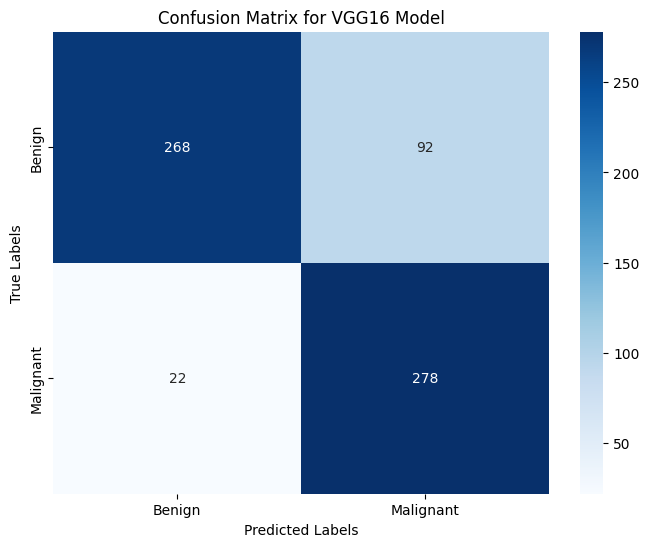

In [38]:
cm = confusion_matrix(test_labels, vgg16_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for VGG16 Model')
plt.show()

In [36]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached pandas-2.2.1-cp39-cp39-win_amd64.whl (11.6 MB)
  Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\USER\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Finding misclassified indices

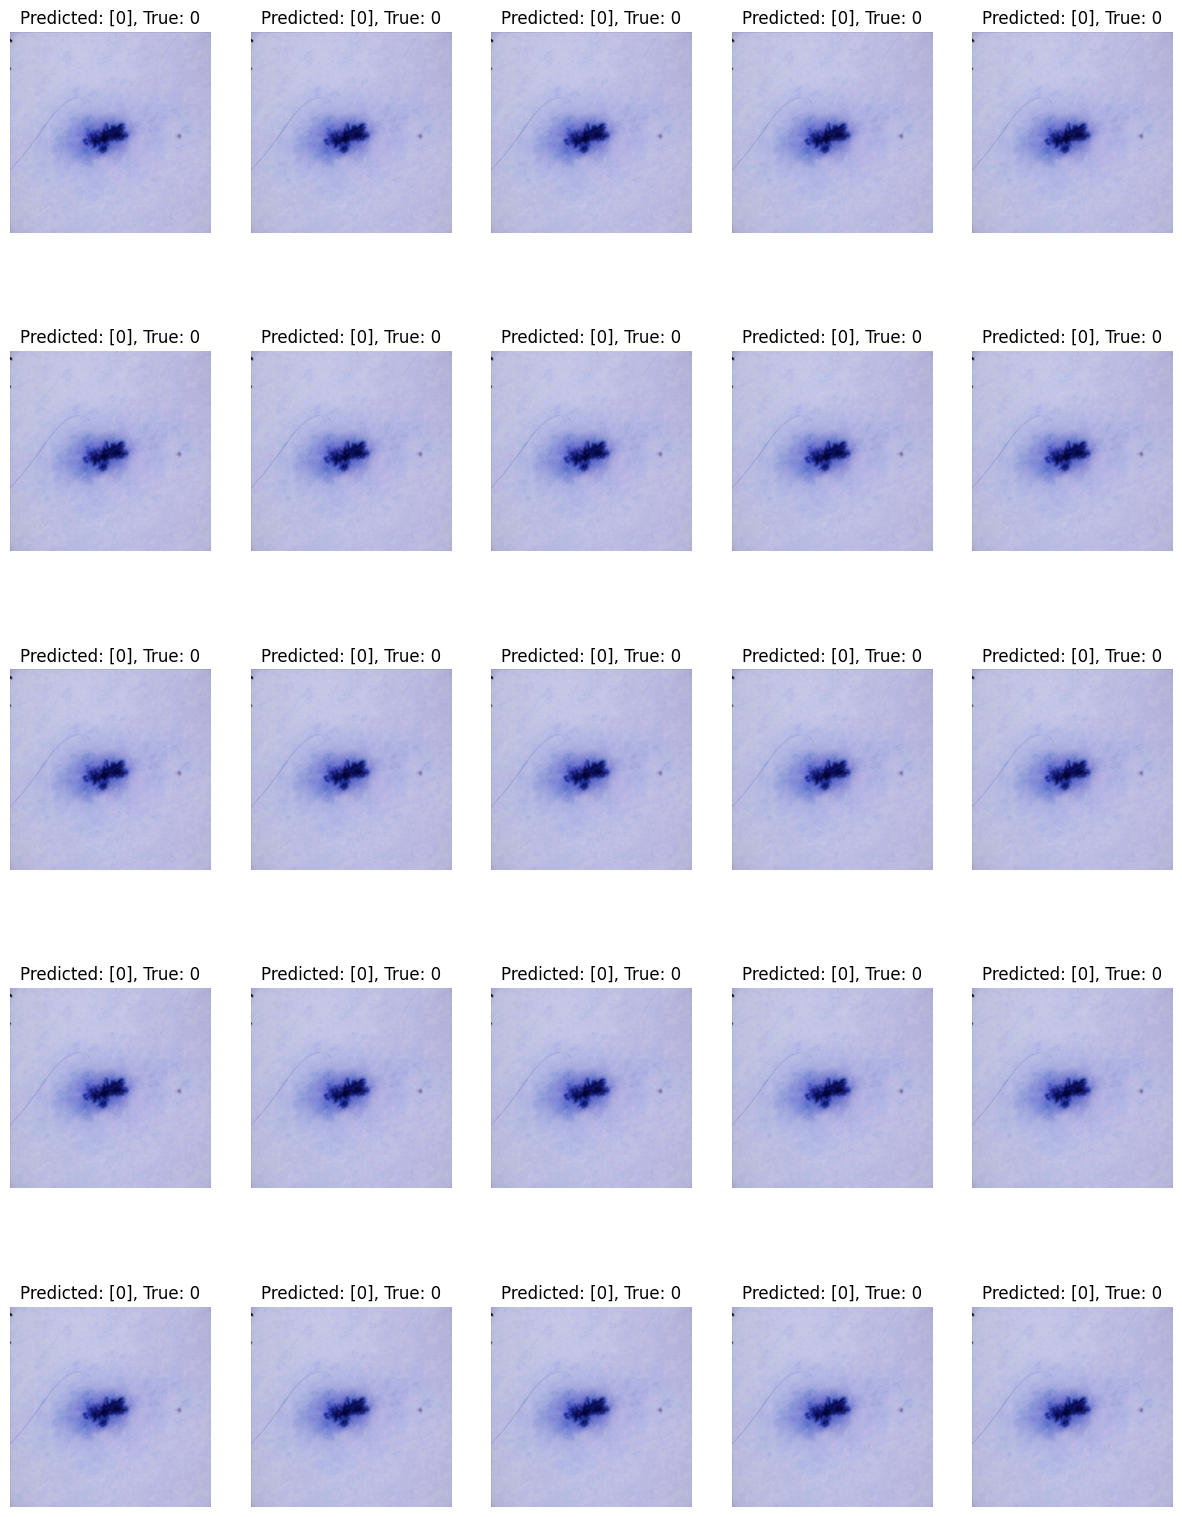

In [40]:
misclassified_indices = np.where(vgg16_predictions != test_labels)[0]

# Visualize misclassified images
plt.figure(figsize=(15, 20))
for i, idx in enumerate(misclassified_indices[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[idx])
    plt.title(f"Predicted: {vgg16_predictions[idx]}, True: {test_labels[idx]}")
    plt.axis('off')
plt.show()

Inference: These are the misclassified indices by the model

## Predictions for CNN model ##

In [42]:
custom_predictions = model_custom.predict(test_images)
custom_predictions = (custom_predictions > 0.5).astype(int)

print("Classification Report for Custom CNN:")
print(classification_report(test_labels, custom_predictions))

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 259ms/step
Classification Report for Custom CNN:
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       360
           1       0.71      0.92      0.80       300

    accuracy                           0.79       660
   macro avg       0.81      0.80      0.79       660
weighted avg       0.82      0.79      0.79       660



Inference: CNN model shows reasonable performance, with high precision and recall for class 1 (malignant) but relatively lower recall for class 0 (benign)

Confusion matrix for CNN Model

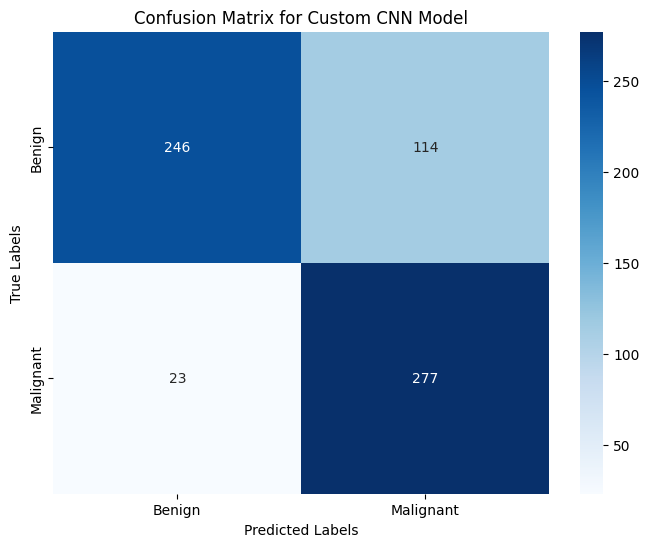

In [43]:
cm_custom = confusion_matrix(test_labels, custom_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_custom, annot=True, cmap="Blues", fmt="d", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Custom CNN Model')
plt.show()

Misclassified indices by CNN Model

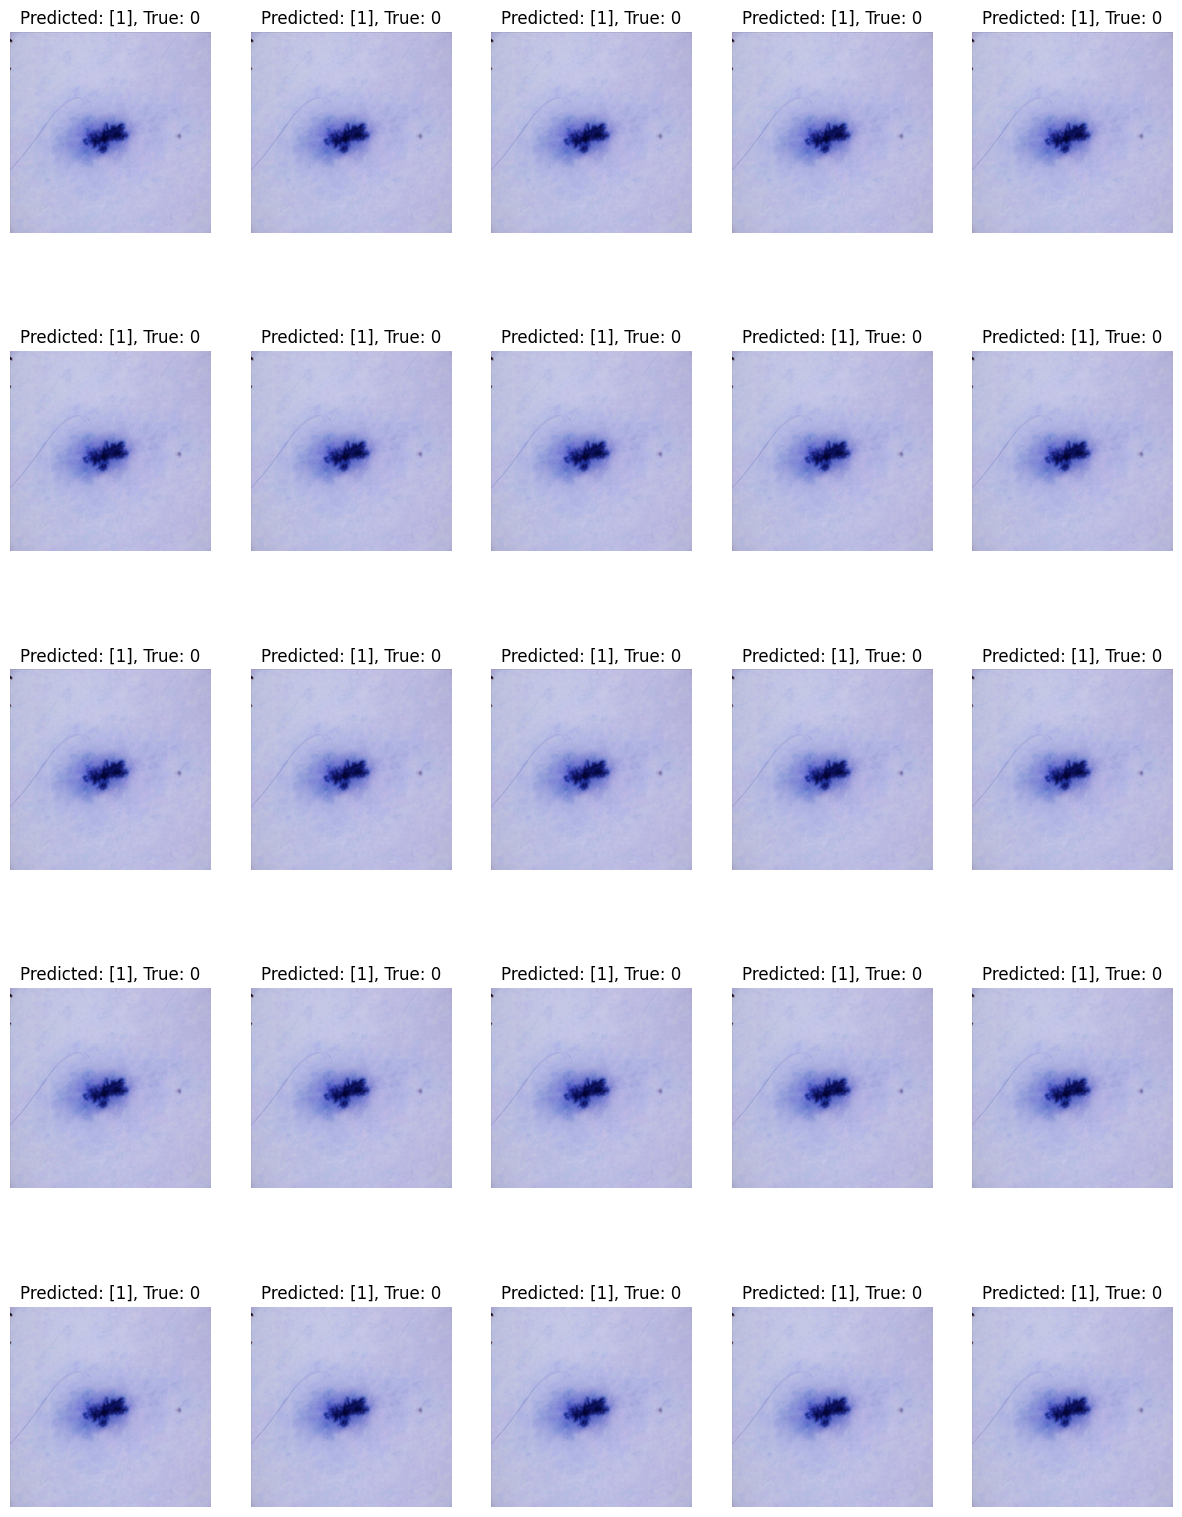

In [46]:
misclassified_indices_custom = np.where(custom_predictions != test_labels)[0]

plt.figure(figsize=(15, 20))
for i, idx in enumerate(misclassified_indices_custom[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[idx])
    plt.title(f"Predicted: {custom_predictions[idx]}, True: {test_labels[idx]}")
    plt.axis('off')
plt.show()

# Conclusion #

VGG16 architecture is performing good when comparing to CNN architecture. Test accuracy is around 82% for VGG16 and 79% for CNN model architecture. This shows that, VGG16 is performing well on testing data, that is unseen by the model. And for this dataset VGG16 model architecture is recommended to find interesting patterns of whether a person will develop a skin cancer or not.